# DATA AUGMENTATION

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
train_data_gen = ImageDataGenerator(rescale = 1./255,
                                    zoom_range = 0.2,
                                    horizontal_flip = True,
                                    vertical_flip = True)

In [3]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
xtrain = train_data_gen.flow_from_directory(r"C:\Users\STUDENT\flowers",target_size=(64,64),
                                           class_mode='categorical',
                                           batch_size=100)

Found 4317 images belonging to 5 classes.


In [5]:
xtest = test_datagen.flow_from_directory(r"C:\Users\STUDENT\flowers",
                                         target_size=(64,64),
                                         class_mode='categorical',
                                         batch_size=100)

Found 4317 images belonging to 5 classes.


In [6]:
xtrain.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

# CNN MODEL

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [8]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation = 'relu',input_shape = (64,64,3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(300,activation = 'relu'))
model.add(Dense(5,activation = 'softmax'))

In [9]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [10]:
model.fit(xtrain, steps_per_epoch = len(xtrain),epochs = 10,
          validation_data = xtest,validation_steps = len(xtest))

Epoch 1/10
44/44 [==============================] - 42s 947ms/step - loss: 1.8975 - accuracy: 0.4072 - val_loss: 1.1988 - val_accuracy: 0.5138
Epoch 2/10
44/44 [==============================] - 20s 456ms/step - loss: 1.1355 - accuracy: 0.5344 - val_loss: 1.1419 - val_accuracy: 0.5495
Epoch 3/10
44/44 [==============================] - 19s 442ms/step - loss: 1.0621 - accuracy: 0.5856 - val_loss: 1.0478 - val_accuracy: 0.5884
Epoch 4/10
44/44 [==============================] - 19s 445ms/step - loss: 1.0030 - accuracy: 0.6145 - val_loss: 1.0467 - val_accuracy: 0.5986
Epoch 5/10
44/44 [==============================] - 19s 440ms/step - loss: 0.9586 - accuracy: 0.6227 - val_loss: 0.9182 - val_accuracy: 0.6511
Epoch 6/10
44/44 [==============================] - 20s 446ms/step - loss: 0.9106 - accuracy: 0.6555 - val_loss: 0.8742 - val_accuracy: 0.6694
Epoch 7/10
44/44 [==============================] - 19s 442ms/step - loss: 0.8881 - accuracy: 0.6558 - val_loss: 0.8718 - val_accuracy: 0.6694

# MODEL TUNING

In [11]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_accuracy',
                        patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',
                        patience=5,
                        factor=0.5,min_lr=0.00001)

callback = [reduce_lr,early_stopping]

In [12]:
model.fit_generator(xtrain,steps_per_epoch=len(xtrain),epochs=10,callbacks=callback,validation_data=xtest,validation_steps=len(xtest))

C:\Users\STUDENT\AppData\Local\Temp\ipykernel_10060\147617075.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(xtrain,steps_per_epoch=len(xtrain),epochs=10,callbacks=callback,validation_data=xtest,validation_steps=len(xtest))


Epoch 1/10
44/44 [==============================] - 20s 453ms/step - loss: 0.7952 - accuracy: 0.6938 - val_loss: 0.8227 - val_accuracy: 0.6921 - lr: 0.0010
Epoch 2/10
44/44 [==============================] - 19s 436ms/step - loss: 0.7721 - accuracy: 0.7035 - val_loss: 0.7456 - val_accuracy: 0.7216 - lr: 0.0010
Epoch 3/10
44/44 [==============================] - 19s 437ms/step - loss: 0.7838 - accuracy: 0.6961 - val_loss: 0.6922 - val_accuracy: 0.7429 - lr: 0.0010
Epoch 4/10
44/44 [==============================] - 20s 446ms/step - loss: 0.7552 - accuracy: 0.7139 - val_loss: 0.7291 - val_accuracy: 0.7234 - lr: 0.0010
Epoch 5/10
44/44 [==============================] - 20s 448ms/step - loss: 0.7457 - accuracy: 0.7146 - val_loss: 0.7806 - val_accuracy: 0.7079 - lr: 0.0010
Epoch 6/10
44/44 [==============================] - 19s 444ms/step - loss: 0.7261 - accuracy: 0.7253 - val_loss: 0.7059 - val_accuracy: 0.7359 - lr: 0.0010
Epoch 7/10
44/44 [==============================] - 19s 435ms/st

# SAVING THE MODEL

In [13]:
model.save("flowerss.h5")

# TESTING THE MODEL

In [14]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [15]:
model = load_model("flowerss.h5")

In [21]:
img = image.load_img("99306615_739eb94b9e_m.jpg",target_size = (150,150))

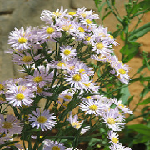

In [22]:
img

In [23]:
img = image.load_img("112428919_f0c5ad7d9d_n.jpg",target_size = (64,64))
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred = np.argmax(model.predict(x))
op = ['daisy','dandelion','rose','sunflower','tulip']
op[pred]

1/1 [==============================] - 0s 31ms/step


'tulip'

In [24]:
img = image.load_img("10919961_0af657c4e8.jpg",target_size = (64,64))
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred = np.argmax(model.predict(x))
op = ['daisy','dandelion','rose','sunflower','tulip']
op[pred]


1/1 [==============================] - 0s 17ms/step


'daisy'